<a href="https://colab.research.google.com/github/SH22Hwang/KoGES_HyperTension/blob/main/HyperTension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고혈압 분석 모델
## @author: sh22h

- year0_NA를 DataFrame으로 불러오고 4개로 나눔
  - binary: 범주형(binary) 변수, 0 / 1 로 변경
  - category: 범주형(>3) 변수, min-max-normalization
  - ctn:연속형 변수, 정규화, 표준화
  - hyperTension: 고혈압

- 각각 정규화 또는 표준화한 후 변수는 X 고혈압은 Y로 둠
  - 정규화(normalization): 0, 1
  - 표준화(standardization): 평균: 0 표준편차: 1

## 학습 모델

- 1차
  - normalize_ctn
  ```
model = Sequential()
model.add(Dense(12, input_dim=52, activation='relu'))  # input layer requires input_dim param
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid instead of relu for final probability between 0 and 1
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
```

- 2차

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/year0_NA.csv', index_col=0, na_values=['NA'])
df = dataset.dropna()  # 10000명 중 결측값 없는 사람만 추출 약 1000명
df

,AS1_SEX,AS1_AGE,AS1_JOBB,AS1_EDUA,AS1_INCOME,AS1_DRINK,AS1_DRDUA,AS1_TOTALC,AS1_SMOKEA,AS1_HVSMAM,AS1_HVSMDU,AS1_PHYSTB,AS1_PHYSIT,AS1_PHYACTL,AS1_PHYACTM,AS1_PHYACTH,AS1_INSUR,AS1_HEALTH,AS0_TIED,AS1_SLPAMTM,AS0_SLPAMSF,AS1_STRPHYSJ,AS1_RGMEALFQA,AS1_HEIGHT,AS1_WEIGHT,AS1_B01,AS1_B02,AS1_B03,AS1_B04,AS1_B05,AS1_B06,AS1_B07,AS1_B08,AS1_B09,AS1_B10,AS1_B11,AS1_B12,AS1_B13,AS1_B14,AS1_B15,AS1_B16,AS1_B17,AS1_B18,AS1_B19,AS1_B20,AS1_B21,AS1_B23,AS1_B24,P1,P2,P3,P4,HYPERTENSION
RID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EPI20_026_2_000009,1,47,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,2.0,3.0,1.0,7.0,1.0,1,3.0,155.0,60.0,2850,99,39,528,1045,1542,23,4569,970,4270,2,1,26,313,10,3,469,135,4879,30,13,27,264,800,443,836,45,0
EPI20_026_2_000032,1,69,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,4.0,0.0,0.0,3.0,4.0,0.0,4.0,1.0,0,3.0,161.0,83.0,1737,54,22,323,296,851,10,1532,361,2561,1,1,13,51,7,2,162,36,2062,19,7,7,107,15,12,745,17,1
EPI20_026_2_000043,1,45,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0,6.0,0.0,0.0,2.0,4.0,0.0,9.0,1.0,0,3.0,151.0,49.0,1901,72,33,325,700,1286,12,2915,598,4047,1,1,15,104,8,2,316,136,2338,32,8,9,322,19,28,935,210,0
EPI20_026_2_000047,1,66,1.0,1.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,7.0,1.0,1.0,0.0,0.0,3.0,2.0,0.0,8.0,1.0,0,3.0,147.0,56.0,1205,30,6,250,164,476,5,1285,299,1696,1,0,8,65,5,1,161,10,1696,11,4,6,47,5,41,725,4,1
EPI20_026_2_000067,0,49,8.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,6.0,1.0,0.0,2.0,3.0,1.0,6.0,0.0,0,3.0,164.0,75.0,2501,104,53,397,668,1510,15,3246,549,3144,2,2,24,112,11,2,281,133,2454,21,7,11,471,73,100,805,178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPI20_026_2_010003,0,40,4.0,3.0,7.0,2.0,4.0,0.0,1.0,0.0,0.0,5.0,8.0,8.0,0.0,1.0,2.0,2.0,1.0,7.0,0.0,1,3.0,165.0,73.0,2264,81,36,403,557,1312,17,3772,665,3723,1,1,21,219,14,3,371,109,3015,27,11,15,243,26,71,930,212,0
EPI20_026_2_010014,0,47,4.0,5.0,5.0,1.0,0.0,0.0,3.0,15.0,24.0,3.0,8.0,3.0,0.0,0.0,2.0,4.0,1.0,6.0,1.0,1,3.0,166.0,72.0,2488,93,44,428,695,1410,16,3670,608,5135,2,1,23,232,11,3,344,107,2922,35,10,15,429,140,37,865,127,1
EPI20_026_2_010015,0,48,8.0,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,2.0,2.0,4.0,0.0,6.0,1.0,0,3.0,167.0,73.0,2044,77,37,347,609,1185,12,2739,477,2263,2,1,21,167,10,2,266,146,1887,15,5,13,195,237,70,821,340,0


In [ ]:
# 범주형(binary) 변수
binary = df.reindex(columns=['AS1_SEX', 'AS0_TIED', 'AS0_SLPAMSF', 'AS1_STRPHYSJ'])
print(binary.shape)

# 범주형(3 이상) 변수
category = df.reindex(columns=['AS1_JOBB', 'AS1_EDUA', 'AS1_INCOME', 'AS1_DRINK',
                               'AS1_DRDUA', 'AS1_SMOKEA', 'AS1_PHYSTB', 'AS1_PHYSIT',
                               'AS1_PHYACTL', 'AS1_PHYACTM', 'AS1_PHYACTH', 'AS1_INSUR',
                               'AS1_HEALTH'
                               ])
category = (category - category.min()) / (category.max() - category.min())
print(category.shape)

# 연속형 변수
ctn = df.reindex(columns=['AS1_AGE', 'AS1_TOTALC', 'AS1_HVSMAM', 'AS1_HVSMDU',
                          'AS1_SLPAMTM', 'AS1_RGMEALFQA', 'AS1_HEIGHT', 'AS1_WEIGHT',
                          'AS1_B01', 'AS1_B02', 'AS1_B03', 'AS1_B04', 'AS1_B05',
                          'AS1_B06', 'AS1_B07', 'AS1_B08', 'AS1_B09', 'AS1_B10',
                          'AS1_B11', 'AS1_B12', 'AS1_B13', 'AS1_B14', 'AS1_B15',
                          'AS1_B16', 'AS1_B17', 'AS1_B18', 'AS1_B19', 'AS1_B20',
                          'AS1_B21', 'AS1_B23', 'AS1_B24', 'P1', 'P2', 'P3', 'P4'
                          ])
print(ctn.shape)
standardize_ctn = (ctn - ctn.mean()) / ctn.std()
normalize_ctn = (ctn - ctn.min()) / (ctn.max() - ctn.min())  # min-max

print(standardize_ctn.shape)
print(normalize_ctn.shape)

(1093, 4)
(1093, 13)
(1093, 35)
(1093, 35)
(1093, 35)


In [ ]:
X = pd.concat([binary, category, normalize_ctn], axis=1)  # 고혈압을 제외한 나머지 변수
y = df['HYPERTENSION']  # 고혈압 변수

# 훈련 데이터 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(983, 52) (110, 52) (983,) (110,)


In [ ]:
X

,AS1_SEX,AS0_TIED,AS0_SLPAMSF,AS1_STRPHYSJ,AS1_JOBB,AS1_EDUA,AS1_INCOME,AS1_DRINK,AS1_DRDUA,AS1_SMOKEA,AS1_PHYSTB,AS1_PHYSIT,AS1_PHYACTL,AS1_PHYACTM,AS1_PHYACTH,AS1_INSUR,AS1_HEALTH,AS1_AGE,AS1_TOTALC,AS1_HVSMAM,AS1_HVSMDU,AS1_SLPAMTM,AS1_RGMEALFQA,AS1_HEIGHT,AS1_WEIGHT,AS1_B01,AS1_B02,AS1_B03,AS1_B04,AS1_B05,AS1_B06,AS1_B07,AS1_B08,AS1_B09,AS1_B10,AS1_B11,AS1_B12,AS1_B13,AS1_B14,AS1_B15,AS1_B16,AS1_B17,AS1_B18,AS1_B19,AS1_B20,AS1_B21,AS1_B23,AS1_B24,P1,P2,P3,P4
RID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EPI20_026_2_000009,1,1.0,1.0,1,0.125,0.4,0.000000,0.0,0.0,0.000000,0.125,0.375,0.125,0.000,0.125,0.5,0.50,0.241379,0.0,0.0,0.00,0.444444,0.5,0.423077,0.328358,0.401776,0.275758,0.128028,0.528302,0.459270,0.353569,0.564103,0.388206,0.291468,0.306058,0.222222,0.2,0.289157,0.331873,0.243243,0.333333,0.364309,0.258621,0.265953,0.235294,0.428571,0.500000,0.150171,0.226436,0.532452,0.271429,0.023089
EPI20_026_2_000032,1,0.0,1.0,0,0.125,0.0,0.000000,0.0,0.0,0.000000,0.750,1.000,0.500,0.000,0.000,1.0,0.75,1.000000,0.0,0.0,0.00,0.111111,0.5,0.538462,0.671642,0.237010,0.139394,0.069204,0.313417,0.108614,0.178054,0.230769,0.111839,0.098319,0.174505,0.111111,0.2,0.132530,0.044907,0.162162,0.222222,0.111842,0.068966,0.106313,0.142857,0.214286,0.115385,0.060865,0.004246,0.014423,0.241883,0.008722
EPI20_026_2_000043,1,0.0,1.0,0,0.125,0.2,0.428571,0.0,0.0,0.000000,0.375,1.000,0.750,0.000,0.000,0.5,0.75,0.172414,0.0,0.0,0.00,0.666667,0.5,0.346154,0.164179,0.261288,0.193939,0.107266,0.315514,0.297753,0.288545,0.282051,0.237692,0.173486,0.288892,0.111111,0.2,0.156627,0.102957,0.189189,0.222222,0.238487,0.260536,0.121954,0.252101,0.250000,0.153846,0.183163,0.005378,0.033654,0.303571,0.107748
EPI20_026_2_000047,1,0.0,1.0,0,0.125,0.0,0.000000,0.5,0.8,0.333333,0.875,0.125,0.125,0.000,0.000,1.0,0.25,0.896552,0.0,0.0,0.00,0.555556,0.5,0.269231,0.268657,0.158253,0.066667,0.013841,0.236897,0.046816,0.082804,0.102564,0.089362,0.078655,0.107921,0.111111,0.0,0.072289,0.060241,0.108108,0.111111,0.111020,0.019157,0.085572,0.075630,0.107143,0.096154,0.026735,0.001415,0.049279,0.235390,0.002052
EPI20_026_2_000067,0,1.0,0.0,0,1.000,0.4,0.428571,0.0,0.0,0.000000,0.250,0.875,0.750,0.125,0.000,0.5,0.50,0.310345,0.0,0.0,0.00,0.333333,0.5,0.596154,0.552239,0.350111,0.290909,0.176471,0.390985,0.282772,0.345441,0.358974,0.267813,0.157945,0.219383,0.222222,0.4,0.265060,0.111720,0.270270,0.222222,0.209704,0.254789,0.128528,0.159664,0.214286,0.192308,0.267918,0.020662,0.120192,0.261364,0.091329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPI20_026_2_010003,0,1.0,0.0,1,0.500,0.4,0.857143,0.5,0.8,0.333333,0.625,1.000,1.000,0.000,0.125,0.5,0.25,0.000000,0.0,0.0,0.00,0.444444,0.5,0.615385,0.522388,0.315026,0.221212,0.117647,0.397275,0.230805,0.295149,0.410256,0.315679,0.194735,0.263952,0.111111,0.2,0.228916,0.228916,0.351351,0.333333,0.283717,0.208812,0.160320,0.210084,0.357143,0.269231,0.138225,0.007359,0.085337,0.301948,0.108774
EPI20_026_2_010014,0,1.0,1.0,1,0.500,0.8,0.571429,0.0,0.0,1.000000,0.375,1.000,0.375,0.000,0.000,0.5,0.75,0.241379,0.0,0.3,0.48,0.333333,0.5,0.634615,0.507463,0.348187,0.257576,0.145329,0.423480,0.295412,0.320041,0.384615,0.306397,0.176657,0.372643,0.222222,0.2,0.253012,0.243154,0.270270,0.333333,0.261513,0.204981,0.155049,0.277311,0.321429,0.269231,0.244027,0.039626,0.044471,0.280844,0.065162
EPI20_026_2_010015,0,0.0,1.0,0,1.000,0.6,0.714286,0.0,0.0,0.000000,0.000,0.625,0.375,0.000,0.250,0.5,0.75,0.275862,0.0,0.0,0.00,0.333333,0.5,0.653846,0.522388,0.282457,0.209091,0.121107,0.338574,0.255150,0.262891,0.282051,0.221676,0.135109,0.151566,0.222222,0.2,0.228916,0.171961,0.243243,0.222222,0.197368,0.279693,0.096396,0.109244,0.142857,0.230769,0.110922,0.067082,0.084135,0.266558,0.174448


In [ ]:
y

RID
EPI20_026_2_000009    0
EPI20_026_2_000032    1
EPI20_026_2_000043    0
EPI20_026_2_000047    1
EPI20_026_2_000067    1
                     ..
EPI20_026_2_010003    0
EPI20_026_2_010014    1
EPI20_026_2_010015    0
EPI20_026_2_010022    0
EPI20_026_2_010026    0
Name: HYPERTENSION, Length: 1093, dtype: int64

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(983, 52) (110, 52) (983,) (110,)


In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=52, activation='relu'))  # input layer requires input_dim param
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid instead of relu for final probability between 0 and 1

# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# call the function to fit to the data (training the network)
# verbose=0 는 프로그래스를 숨깁니다.
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
# print(history.history)

# 모델의 정확도를 계산합니다.
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

4/4 [==============================] - 0s 4ms/step - loss: 1.2596 - accuracy: 0.7727
accuracy: 77.27%


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epoch'), Text(0.5, 1.0, 'model loss')]

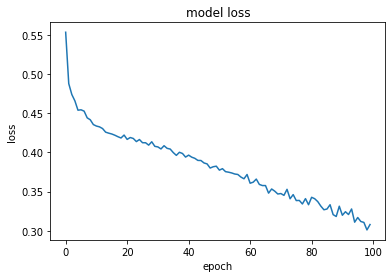

In [ ]:
fig, ax1 = plt.subplots()

# 모델의 오차를 그립니다.
ax1.plot(history.history['loss'])
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')